In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 1. Preprocesar Documentos

In [1]:
import pandas as pd
import spacy
import json
import os
# Cargar el modelo de spaCy (usa el modelo adecuado para el idioma de los textos (español == es_core_news_md)
nlp = spacy.load('en_core_web_md')  #                                            (inglés == en_core_web_md)

# Configuración de stopwords y POS válidos
valid_POS = {'VERB', 'NOUN', 'ADJ', 'PROPN'}
stopwords = nlp.Defaults.stop_words

# Función de preprocesamiento
def preprocess_text(text):
    """
    Preprocesa un texto para prepararlo para técnicas como BoW o TF-IDF.
    - Filtra stopwords
    - Lematiza palabras
    - Retiene solo palabras alfabéticas y ciertas POS

    Args:
        text (str): Texto a procesar.

    Returns:
        str: Texto procesado.
    """
    try:
        # Procesar con spaCy (Tokenizar)
        doc = nlp(text)

        # Filtrar y lematizar
        lemmatized = [
            token.lemma_.lower() for token in doc
            if token.is_alpha and token.pos_ in valid_POS # Filtrar POS
            and token.text.lower() not in stopwords # Elimina StopWords
        ]
        return " ".join(lemmatized)
    except Exception as e:
        print(f"Error procesando texto: {e}")
        return ""

# Función para aplicar a todas las filas de un DataFrame
def preprocess_dataframe(df, text_columns):
    """
    Aplica el preprocesamiento a las columnas de texto seleccionadas en un DataFrame.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        text_columns (list): Lista de nombres de columnas a combinar y procesar.

    Returns:
        pd.DataFrame: DataFrame con una nueva columna 'processed_text'.
    """
    try:
        # Combinar columnas de texto en una sola
        df['combined_text'] = df[text_columns].fillna('').apply(lambda row: ' '.join(row), axis=1)

        # Aplicar el preprocesamiento
        df['processed_text'] = df['combined_text'].apply(preprocess_text)
        return df
    except Exception as e:
        print(f"Error procesando DataFrame: {e}")
        return df

def save_processed_text_to_file(df, column_name, file_name, drive_folder_path):
    """
    Guarda los textos preprocesados de un DataFrame en un archivo .txt.

    Args:
        df (pd.DataFrame): DataFrame que contiene la columna con textos preprocesados.
        column_name (str): Nombre de la columna que contiene los textos preprocesados.
        file_name (str): Nombre del archivo donde guardar los textos.
    """
    try:
        # Abrir el archivo en modo escritura
        with open(file_name, 'w', encoding='utf-8') as f:
            # Escribir cada texto en una línea separada
            for text in df[column_name]:
                f.write(text + '\n')
        print(f"Textos guardados en el archivo: {file_name}")

        # Ruta completa en Google Drive
        drive_file_path = os.path.join(drive_folder_path, file_name)

        # Mover el archivo al Google Drive
        shutil.move(file_name, drive_file_path)
        print(f"Archivo también guardado en Google Drive: {drive_file_path}")
    except Exception as e:
        print(f"Error al guardar en archivo: {e}")



## 1.1 Cargar y Preprocesar todos los datos del dataset (Cambiar rutas y archivos para los datos)

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo en tu Google Drive
file_path = '/content/drive/MyDrive/MÁSTER/NLP/output_bueno.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Ver las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())
text_columns = ['title', 'abstract']

# Aplicar preprocesamiento a estas columnas
preprocessed_df = preprocess_dataframe(df, text_columns=text_columns)
save_processed_text_to_file(preprocessed_df, column_name='processed_text', file_name='processed_texts.txt', drive_folder_path= '/content/drive/MyDrive/MÁSTER/NLP')

# Mostrar las primeras filas después del preprocesamiento
print("Primeras filas después del preprocesamiento:")
print(preprocessed_df[['title', 'processed_text']])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:
                                               title  \
0  Calculation of prompt diphoton production cros...   
1           Sparsity-certifying Graph Decompositions   
2  The evolution of the Earth-Moon system based o...   
3  A determinant of Stirling cycle numbers counts...   
4  From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...   

                                            abstract       categories  \
0    A fully differential calculation in perturba...           hep-ph   
1    We describe a new algorithm, the $(k,\ell)$-...    math.CO cs.CG   
2    The evolution of Earth-Moon system is descri...   physics.gen-ph   
3    We show that a determinant of Stirling cycle...          math.CO   
4    In this paper we show how to compute the $\L...  math.CA math.FA   

         id  
0  704.0001  
1  704.0002  
2  704.0003  
3  704.0004

In [ ]:
import shutil
from google.colab import files

# Comprimir el archivo generado
shutil.make_archive('processed_texts', 'zip', '.', 'processed_texts.txt')

# Descargar el archivo comprimido
files.download('processed_texts.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 <                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## 1.2. Cargando Nuestros Datos

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo JSON en tu Drive
file_path = '/content/drive/MyDrive/MÁSTER/NLP/arxiv-metadata-oai-snapshot.json'

# Cargar datos desde el archivo JSON
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Crear un DataFrame con las columnas relevantes
df = pd.DataFrame(data)

# Seleccionar las columnas que nos interesan para análisis
# En este caso, usaremos 'authors', 'title', y 'abstract'
df = df[['authors', 'title', 'abstract']]

# Renombrar las columnas para consistencia con el preprocesamiento
df.rename(columns={'authors': 'author'}, inplace=True)

# Verificar el DataFrame cargado
print(df.head())

# Aplicar la función de preprocesamiento
preprocessed_df = preprocess_dataframe(df, text_columns=['title', 'abstract'])

# Mostrar el resultado
print(preprocessed_df[['author', 'processed_text']])
save_processed_text_to_file(preprocessed_df, column_name='processed_text', file_name='processed_texts.txt')


# 2. Crear un Corpus

In [2]:
mycorpus = open('processed_texts.txt').readlines()
mycorpus = [el.strip().split() for el in mycorpus]

print(('Number of documents in corpus: '+str(len(mycorpus))))
print(('============= First document in corpus ============='))
print(mycorpus[0])
print(('============= Corresponding Python string ============='))
print(' '.join(mycorpus[0]))

Number of documents in corpus: 50000
============= First document in corpus =============
['calculation', 'prompt', 'diphoton', 'production', 'cross', 'section', 'tevatron', 'lhc', 'energie', 'differential', 'calculation', 'perturbative', 'quantum', 'chromodynamic', 'present', 'production', 'massive', 'photon', 'pair', 'hadron', 'collider', 'lead', 'order', 'perturbative', 'contribution', 'quark', 'antiquark', 'gluon', 'gluon', 'subprocesse', 'include', 'order', 'resummation', 'initial', 'state', 'gluon', 'radiation', 'valid', 'lead', 'logarithmic', 'accuracy', 'region', 'phase', 'space', 'specify', 'calculation', 'reliable', 'good', 'agreement', 'demonstrate', 'datum', 'fermilab', 'tevatron', 'prediction', 'detailed', 'test', 'cdf', 'datum', 'prediction', 'show', 'distribution', 'diphoton', 'pair', 'produce', 'energy', 'large', 'hadron', 'collider', 'lhc', 'distribution', 'diphoton', 'pair', 'decay', 'higgs', 'boson', 'contrast', 'produce', 'qcd', 'process', 'lhc', 'show', 'enhance', 

# 3. Detectar N-Grams (Opcional, si queremos hacerlo debemos ajustar los thresholds para detectar buenos N-Grams)

In [ ]:
from gensim.models.phrases import Phrases

phrase_model = Phrases(mycorpus, min_count=2, threshold=20)
mycorpus = [el for el in phrase_model[mycorpus]] #We populate mycorpus again
print(('============= First document after N-gram replacement ============='))
print(mycorpus[0])

# 4. Creamos un Diccionario

In [3]:
from gensim.corpora import Dictionary

no_below = 4 #Minimum number of documents to keep a term in the dictionary
no_above = .60 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

# Create dictionary of tokens
D = Dictionary(mycorpus)
D.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])
print('Palabras más comunes:',D.most_common(20))

The dictionary contains 16588 terms
First terms in the dictionary:
0 : accuracy
1 : agreement
2 : antiquark
3 : boson
4 : calculation
5 : cdf
6 : chromodynamic
7 : collider
8 : contrast
9 : contribution
Palabras más comunes: [('model', 29440), ('result', 21082), ('field', 20065), ('study', 16939), ('system', 16853), ('state', 16295), ('energy', 15952), ('find', 14262), ('theory', 14159), ('time', 14047), ('quantum', 13677), ('high', 13229), ('present', 13195), ('function', 13132), ('star', 12078), ('mass', 11840), ('space', 11261), ('large', 11242), ('non', 10952), ('order', 10640)]


# 5. Hacemos BoW

In [4]:
mycorpus_bow = [D.doc2bow(doc) for doc in mycorpus]

n_project = 1000
print(('============= Project abstract (lemmas) ============='))
print(' '.join(mycorpus[n_project]))

print(('============= Sparse vector representation ============='))
print(mycorpus_bow[n_project])

print(('============= Word counts for the project ============='))
print(list(map(lambda x: (D[x[0]], x[1]), mycorpus_bow[n_project])))

print(D.token2id)
print(f"Tamaño del diccionario: {len(D)}")
print(f"Total de documentos en el corpus: {len(mycorpus_bow)}")


============= Project abstract (lemmas) =============
tautological relation hodge field theory propose hodge field theory construction capture algebraic property reduction zwiebach invariant gromov witten invariant generalize barannikov kontsevich construction case high genera correlator gravitational descendant prove main theorem state define hodge field theory correlator satisfy tautological relation perspective statement barannikov kontsevich construction provide solution wdvv equation look simple particular case theorem generalize particular case low genera tautological relation prove early work replace old technical proof novel conceptual proof
============= Sparse vector representation =============
[(61, 1), (83, 2), (90, 2), (94, 2), (99, 1), (104, 3), (109, 1), (128, 3), (146, 1), (268, 3), (274, 1), (283, 1), (292, 1), (296, 1), (312, 1), (369, 1), (405, 3), (408, 1), (418, 1), (455, 1), (465, 1), (467, 2), (701, 1), (712, 1), (791, 1), (877, 2), (997, 3), (1083, 1), (1517, 1

# 6. Crear LDA

In [ ]:
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
# Medimos la coherencia para encontrar el mejor valor de numtopics
def compute_coherence_values(dictionary, corpus, texts, start=100, limit=151, step=10):
    coherence_values = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append((num_topics, coherence_model.get_coherence()))
    return coherence_values

# Ejecutar
coherence_values = compute_coherence_values(D, mycorpus_bow, mycorpus, start=20, limit=60, step=10)

# Imprimir resultados
for num_topics, coherence in coherence_values:
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence}")

Num Topics: 100, Coherence Score: 0.4570928353272726
Num Topics: 110, Coherence Score: 0.4542774757050815
Num Topics: 120, Coherence Score: 0.44298327546850325
Num Topics: 130, Coherence Score: 0.4411073234684268
Num Topics: 140, Coherence Score: 0.4414958085205463
Num Topics: 150, Coherence Score: 0.43239153829324306


In [5]:
from gensim.models.ldamodel import LdaModel
num_topics = 80
# 0.48 coherence
ldag = LdaModel(corpus=mycorpus_bow, id2word=D, num_topics=num_topics, passes=10, random_state=42)

# 7. Añadir la distribución de probabilidad del LDA al dataset original

In [6]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo en tu Google Drive
file_path = '/content/drive/MyDrive/MÁSTER/NLP/output_bueno.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
all_doc_topics = [
    [(f"{topic_id}", prob) for topic_id, prob in ldag.get_document_topics(bow, minimum_probability=0.001)]
    for bow in mycorpus_bow
]

new_df = df.copy()
new_df['topic_distribution'] = all_doc_topics
new_df.head(10)

,title,abstract,categories,id,topic_distribution
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,704.0001,"[(6, 0.03385964), (20, 0.03287259), (21, 0.013..."
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,704.0002,"[(6, 0.015022807), (8, 0.29834053), (21, 0.066..."
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,704.0003,"[(1, 0.01177972), (4, 0.16045782), (10, 0.0303..."
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,704.0004,"[(1, 0.031633098), (8, 0.051943827), (11, 0.03..."
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,704.0005,"[(22, 0.14159086), (28, 0.06358145), (45, 0.58..."
5,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,cond-mat.mes-hall,704.0006,"[(6, 0.1723523), (15, 0.016909825), (16, 0.015..."
6,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,gr-qc,704.0007,"[(1, 0.011117954), (3, 0.11763047), (4, 0.0335..."
7,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,cond-mat.mtrl-sci,704.0008,"[(2, 0.021639787), (3, 0.059083566), (5, 0.015..."
8,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,astro-ph,704.0009,"[(6, 0.006300805), (9, 0.007201766), (13, 0.45..."
9,"Partial cubes: structures, characterizations, ...",Partial cubes are isometric subgraphs of hyp...,math.CO,704.0010,"[(8, 0.11002619), (20, 0.06496321), (26, 0.040..."


In [8]:
new_df.to_csv('/content/drive/MyDrive/MÁSTER/NLP/nuevo_dataframe_80.csv', index=False)

print("El archivo CSV se guardó correctamente.")


El archivo CSV se guardó correctamente.


In [9]:
# Mostrar las palabras más relevantes de cada tópico
num_words = 10  # Número de palabras por tópico

topics = ldag.show_topics(num_topics=num_topics, num_words=num_words, formatted=True)
for topic_id, topic_words in topics:
    print(f"Tópico {topic_id}: {topic_words}")

Tópico 0: 0.141*"condition" + 0.130*"boundary" + 0.044*"singularity" + 0.039*"inflation" + 0.033*"perturbation" + 0.028*"singular" + 0.024*"initial" + 0.024*"cone" + 0.020*"infinity" + 0.016*"potential"
Tópico 1: 0.147*"pattern" + 0.130*"normal" + 0.107*"contact" + 0.047*"log" + 0.033*"clustering" + 0.032*"content" + 0.030*"resistance" + 0.025*"orient" + 0.022*"nebulae" + 0.021*"exclusive"
Tópico 2: 0.074*"area" + 0.062*"localize" + 0.056*"sigma" + 0.052*"localization" + 0.051*"chaotic" + 0.046*"anti" + 0.031*"pole" + 0.028*"compression" + 0.026*"granular" + 0.020*"multiplet"
Tópico 3: 0.060*"field" + 0.054*"theory" + 0.036*"gravity" + 0.030*"scalar" + 0.023*"tensor" + 0.021*"gauge" + 0.018*"spacetime" + 0.018*"general" + 0.017*"action" + 0.014*"conformal"
Tópico 4: 0.102*"matter" + 0.087*"dark" + 0.056*"cosmological" + 0.051*"energy" + 0.046*"universe" + 0.036*"model" + 0.026*"constant" + 0.021*"cosmology" + 0.016*"density" + 0.016*"constraint"
Tópico 5: 0.093*"plane" + 0.063*"directi

### 7.1. Extraer Topics principales


In [1]:
import ast
import pandas as pd

keywords_topics = pd.read_csv('/content/drive/MyDrive/MÁSTER/NLP/keywords_topics.csv')
nuevo_dataframe_80 = pd.read_csv('/content/drive/MyDrive/MÁSTER/NLP/nuevo_dataframe_80.csv')
def extract_topics_with_threshold(row, threshold, topic_dict):
    # Convertir la cadena de tuplas en una lista de tuplas
    topic_distribution = ast.literal_eval(row)
    # Ordenar los tópicos por probabilidad en orden descendente y seleccionar los 3 mejores
    top_topics = sorted(topic_distribution, key=lambda x: x[1], reverse=True)[:3]
    # Filtrar los tópicos que cumplen con el umbral
    selected_topics = [topic_dict[int(topic)] for topic, prob in top_topics if prob > threshold]
    return ', '.join(selected_topics)

# Crear un diccionario de tópicos y sus keywords
topic_dict = dict(zip(keywords_topics['Tópico'].str.extract(r'(\d+)')[0].astype(int), keywords_topics['Keyword']))

# Establecer el umbral de probabilidad
threshold = 0.01

# Crear la nueva columna con los nombres de los tópicos
nuevo_dataframe_80['main_topics'] = nuevo_dataframe_80['topic_distribution'].apply(
    lambda x: extract_topics_with_threshold(x, threshold, topic_dict)
)

nuevo_dataframe_80.to_csv('/content/drive/MyDrive/MÁSTER/NLP/nuevo_dataframe_80_keywords.csv', index=False)
nuevo_dataframe_80.head(5)

,title,abstract,categories,id,topic_distribution,main_topics
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,704.0001,"[('6', 0.03385964), ('20', 0.03287259), ('21',...","Stellar Disks and Formation, Scaling and Criti..."
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,704.0002,"[('6', 0.015022807), ('8', 0.29834053), ('21',...","Graphs and Computational Complexity, Collision..."
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,704.0003,"[('1', 0.01177972), ('4', 0.16045782), ('10', ...","Composite Spheres and Microstructures, Dark Ma..."
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,704.0004,"[('1', 0.031633098), ('8', 0.051943827), ('11'...","Error Codes and Signal Modulations, Cross Sect..."
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,704.0005,"[('22', 0.14159086), ('28', 0.06358145), ('45'...","Functional Cycles and Interferometers, Collisi..."


In [2]:
import pandas as pd
nuevo_dataframe_80 = pd.read_csv('/content/drive/MyDrive/MÁSTER/NLP/nuevo_dataframe_80_keywords.csv')
def convert_to_list(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except Exception as e:
        print(f"Error converting: {value}, {e}")
        return []

# Convertir la columna a listas reales
nuevo_dataframe_80['topic_distribution'] = nuevo_dataframe_80['topic_distribution'].apply(convert_to_list)

# 8. Sacar Matriz de embeddings de los documentos a partir de las distribuciones calculadas

In [3]:
corpus_size = len(nuevo_dataframe_80)
print(f"Original dataset contains {corpus_size} documents")
nuevo_dataframe_80.head()

Original dataset contains 50000 documents


,title,abstract,categories,id,topic_distribution,main_topics
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,704.0001,"[(6, 0.03385964), (20, 0.03287259), (21, 0.013...","Stellar Disks and Formation, Scaling and Criti..."
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,704.0002,"[(6, 0.015022807), (8, 0.29834053), (21, 0.066...","Graphs and Computational Complexity, Collision..."
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,704.0003,"[(1, 0.01177972), (4, 0.16045782), (10, 0.0303...","Composite Spheres and Microstructures, Dark Ma..."
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,704.0004,"[(1, 0.031633098), (8, 0.051943827), (11, 0.03...","Error Codes and Signal Modulations, Cross Sect..."
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,704.0005,"[(22, 0.14159086), (28, 0.06358145), (45, 0.58...","Functional Cycles and Interferometers, Collisi..."


In [4]:
from gensim.matutils import corpus2csc

# Ensure topic IDs are integers
nuevo_dataframe_80['topic_distribution'] = nuevo_dataframe_80['topic_distribution'].apply(
    lambda lst: [(int(topic), prob) for topic, prob in lst]
)

# Use the topic distributions directly
X = nuevo_dataframe_80['topic_distribution'].values.tolist()

# Convert to sparse matrix
X = corpus2csc(X).T

# Check dimensions and nonzero values
n_topics = X.shape[1]
n_docs = X.shape[0]
print(f"Number of topics: {n_topics}")
print(f"X: sparse matrix with {X.nnz} nonzero values out of {n_docs * n_topics}")
print(X.shape)


Number of topics: 80
X: sparse matrix with 706143 nonzero values out of 4000000
(50000, 80)


In [5]:
n = 0
print(f"Document: ")
print(f"Title:        {nuevo_dataframe_80.iloc[n].title}")
print(f"Embedding:")
print(X[n, :])

Document: 
Title:        Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies
Embedding:
  (0, 6)	0.03385964
  (0, 20)	0.03287259
  (0, 21)	0.013822409
  (0, 42)	0.09000899
  (0, 47)	0.02275931
  (0, 49)	0.014560781
  (0, 59)	0.011819772
  (0, 65)	0.015405919
  (0, 66)	0.020671854
  (0, 69)	0.6360074
  (0, 71)	0.08579187
  (0, 79)	0.012865557


In [6]:
import numpy as np
import scipy.sparse as scsp

print(f"{(1 - X.nnz / n_docs / n_topics) * 100:.2f} % ")
print(f"Average row sum: {np.mean(X.sum(axis=1).T)}")

# Normalization:
X = scsp.csr_matrix(X / np.sum(X, axis=1))
print(f"Average row sum after normalization: {np.mean(X.sum(axis=1).T)}")

82.35 % 
Average row sum: 0.984033177016194
Average row sum after normalization: 1.0


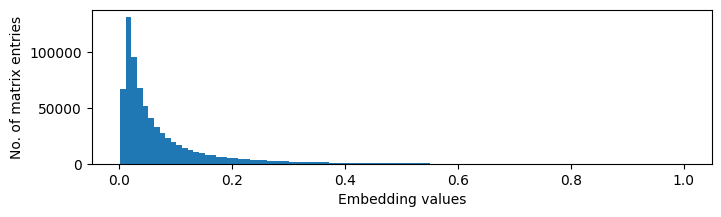

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.hist(X.data, bins=100)
plt.xlabel('Embedding values')
plt.ylabel('No. of matrix entries')
plt.show()

# 9. BC similarity

In [8]:
i = 0
xi = X[i, :].T
# You can do the computation in a single line, multiplying sqrt(X) times sqrt(xi).
# BC = <FILL IN>
BC = (np.sqrt(X) @ np.sqrt(xi))

# This may be useful to convert your solution into a 1D array.
BC = BC.toarray().T[0]

In [9]:
# imin = <FILL IN>
imin = np.argmin(BC)

BC_i = BC
BC_i[i] = 0

# imax = <FILL IN>
imax = np.argmax(BC_i)

In [10]:
print("Test document: ")
print(f"-- Position: {i}")
print(f"-- Title:        {nuevo_dataframe_80.iloc[i].title}\n")
# print(f"-- Clean lemmas: {nuevo_dataframe_80.iloc[i].clean_lemmas}")

print("Most similar document: ")
print(f"-- Position: {imax}")
print(f"-- Title:        {nuevo_dataframe_80.iloc[imax].title}")
#print(f"-- Clean lemmas: {nuevo_dataframe_80.iloc[imax].clean_lemmas}")
print(f"--BC: {BC_i[imax]}\n")

print("Least similar document: ")
print(f"-- Position: {imin}")
print(f"-- Title:        {nuevo_dataframe_80.iloc[imin].title}")
print(f"-- BC: {BC_i[imin]}")
#print(f"-- Clean lemmas: {nuevo_dataframe_80.iloc[imin].clean_lemmas}")

Test document: 
-- Position: 0
-- Title:        Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies

Most similar document: 
-- Position: 29369
-- Title:        Soft-gluon resummation for Higgs differential distributions at the Large
  Hadron Collider
--BC: 0.8585219039527104

Least similar document: 
-- Position: 2
-- Title:        The evolution of the Earth-Moon system based on the dark matter field
  fluid model
-- BC: 0.0


# 10. Similarity Matrix

In [ ]:
# Compute BC similarity
# <SOL>
sqrtX = np.sqrt(X)
S = sqrtX.dot(sqrtX.T)

print('Size of S', S.shape)
print('Number of non-zero components in S:', S.nnz)
print(f'Proportion of non-zero components: {S.nnz / n_docs**2 * 100} % ')
# </SOL>

In [ ]:
S = scsp.triu(S, k=1)

# print('Number of non-zero components in S:', <FILL IN>
print('Number of non-zero components in S:', S.nnz)

# 11. Construir el grafo

In [ ]:
# n_nodes = <FILL IN>
n_nodes = n_docs
# n_edges = <FILL IN>
n_edges = S.nnz
# n_edges_per_node = <FILL IN>
n_edges_per_node = n_edges / n_nodes

print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")
print(f"Number of edges per node: {n_edges_per_node}")


In [ ]:
# Set average number of edges per node
n_edges_per_node = 10
sample_factor = 1
# Compute threshold to get the target number of edges
# <SOL>
n_edges = n_docs * n_edges_per_node
n_edges = min(n_edges, S.nnz)
thr = -np.sort(-S.data)[n_edges]
# </SOL>

# Apply the threshold to similarity matrix
# <SOL>
S.data = np.where(S.data <= thr, 0, S.data)
S.eliminate_zeros()
n_edges = len(S.data)
# </SOL>

print(f"Threshold: {thr}")
print(f"Number of edges: {n_edges}")
print('Estimated number of links in full corpus:', len(S.data)/2/sample_factor**2)

In [ ]:
import networkx as nx
import networkx.algorithms.community as nx_comm
try:
    from google.colab import drive
    in_colab = True
except:
    in_colab = False

# WARNING: In Google Colab, you might need to use from_scipy_sparse_matrix
if in_colab:
    G = nx.from_scipy_sparse_array(S)
else:
    G = nx.from_scipy_sparse_array(S)

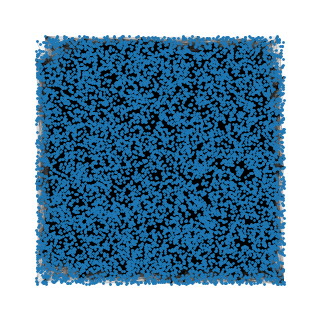

In [ ]:
# ########################
# Testing a random  layout

positions = nx.drawing.layout.random_layout(G)
plt.figure(figsize=(3,3))
nx.draw(G, positions, node_size=1, width=0.02)

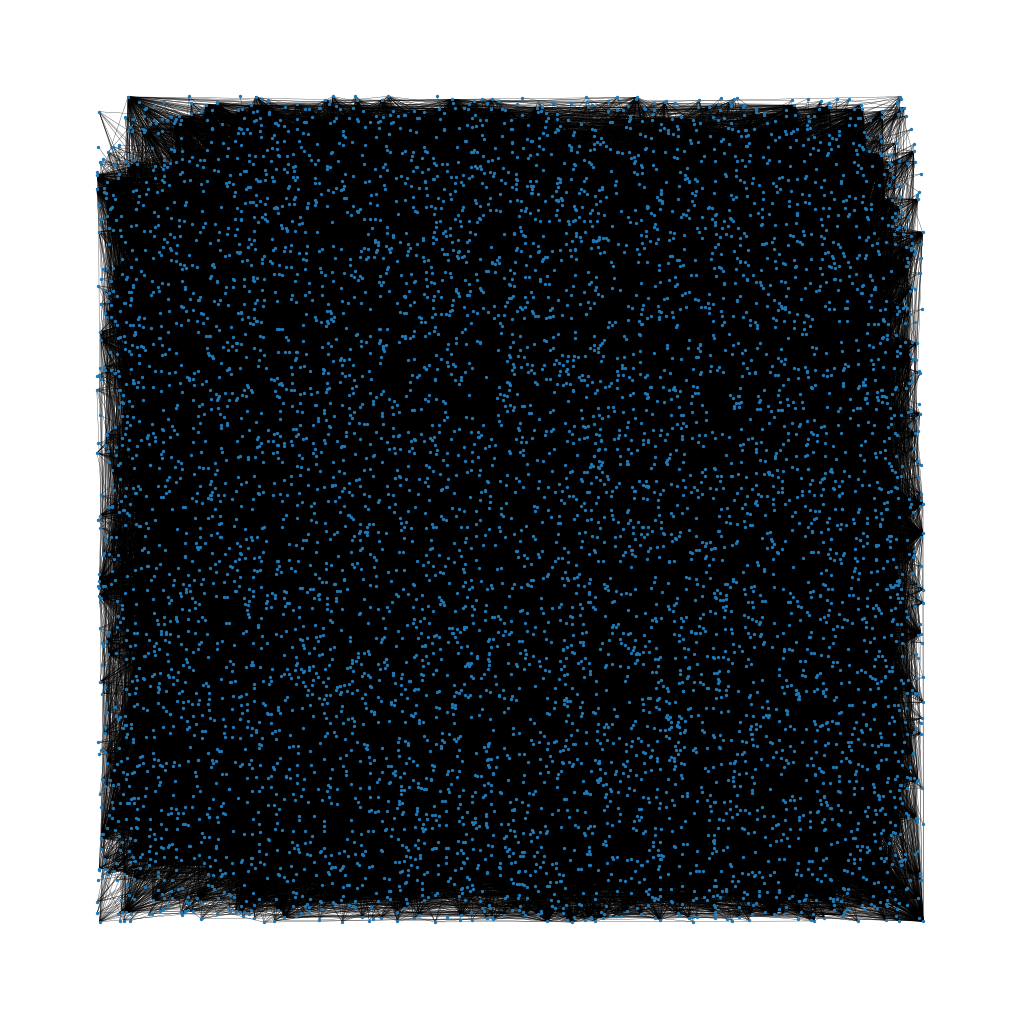

In [ ]:
# <SOL>
# Nodes of the LCC
nodes_lcc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(nodes_lcc).copy()

plt.figure(figsize=(10,10))
nx.draw(G_lcc, positions, node_size=2, width=0.2)
# </SOL>

In [ ]:
!pip install fa2-modified

In [ ]:
from fa2_modified import ForceAtlas2

# Compute positions using layout algorithm
gravity = 50

# Create layout object
# <SOL>
layout = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,
    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED
    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=gravity,
    # Log
    verbose=True)
# </SOL>

# This is a hack to avoid an execution error depending on the version of networkx. You can
# simply ignore but not remove it
if not hasattr(nx, "to_scipy_sparse_matrix"):
    def to_scipy_sparse_matrix(G, dtype='f', format='lil'):
        return nx.to_scipy_sparse_array(G_lcc)
    nx.to_scipy_sparse_matrix = to_scipy_sparse_matrix

# Compute node positions using forceatlas2_networkx_layout method.
# positions = <FILL IN>
positions = layout.forceatlas2_networkx_layout(G_lcc, pos=None, iterations=200)

# Draw graph
# <SOL>
plt.figure(figsize=(5,5))
nx.draw(G_lcc, positions, node_size=1, width=0.1)
# </SOL>


# EXTRA. Encontrar los documentos más relevantes de un tópic

In [ ]:
def most_relevant_documents(ldag, topicid, corpus_bow, ndocs=10):
    """This function returns the most relevant documents in corpus_bow

    : ldag: The trained topic model object provided by gensim
    : topicid: The topic for which we want to find the most relevant documents
    : corpus_bow: The BoW representation of documents in Gensim format
    : ndocs: Number of most relevant documents to return

    : Returns: A list with the identifiers of the most relevant documents
    """
    print('Computing most relevant documents for Topic', topicid)
    print('Topic composition is:')
    print(ldag.show_topic(topicid))

    # Compute relevance of each document for the given topic
    doc_topic_probs = [
        (doc_id, ldag.get_document_topics(bow, minimum_probability=0)[topicid][1])
        for doc_id, bow in enumerate(corpus_bow)
    ]

    # Sort documents by their probability for the topic in descending order
    sorted_docs = sorted(doc_topic_probs, key=lambda x: x[1], reverse=True)

    # Extract the identifiers of the most relevant documents
    most_relevant_doc_ids = [doc_id for doc_id, _ in sorted_docs[:ndocs]]

    return most_relevant_doc_ids

# To test the function we will find the most relevant projects for one of the topics
project_id = most_relevant_documents(ldag, 8, mycorpus_bow, ndocs=3)

# Print titles of selected projects
for idproject in project_id:
    print('\n', ' '.join(mycorpus[idproject]))

Computing most relevant documents for Topic 8
Topic composition is:
[('energy', 0.02078885), ('decay', 0.01685227), ('neutrino', 0.014400689), ('datum', 0.013718237), ('production', 0.013240603), ('experiment', 0.010467879), ('measurement', 0.010462146), ('particle', 0.010177522), ('cross', 0.00971649), ('result', 0.009659581)]

 search higgs boson produce association z boson ppbar collision describe search standard model higgs boson mass gev gev datum correspond integrate luminosity collect detector fermilab tevatron ppbar collider center mass energy higgs boson require produce association z boson z boson require decay electron muon higgs boson decay bbbar pair datum describe expected background lead confidence level cross section upper limit range

 w mass width measurement tevatron present measurement w boson mass width cdf run ii datum measurement perform electron muon decay channel rely fit w transverse mass distribution measure mev mev represent world single precise measurement d